<a href="https://colab.research.google.com/github/TALeonard/19ma573thomasleonard/blob/master/src/hw3_option_combinations_v02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW 3, Part 1: Option Combinations

The problem wants us to graph the payoff diagrams of $2$ specific options combinations. The first is a written $40$-strike saddle, and the second is a butterfly featuring a written $40$-strike saddle, a purchased $45$-strike call, and a purchased $35$-strike put.

____

__Combination Description: 40-Strike Saddle__

A written K-Strike Saddle is a combination of $2$ options, namely selling one $K$-strike call and one $K$-strike put, both of $1$ unit. When we sell a $K$-strike call, our "payoff" is $0$ until strike $K$, as we have no profit or loss when the option is not exercised (as the option holder wouldn't exercise when the stock price is below the strike). After $K$, the line has a slope of $-1$ (as we're now losing money proportional to the difference between the strike $K$ and the exercise price, since we're having to pay the difference).

When we sell a $K$-strike put, our "payoff" is a mirror of the sold call centered on the strike price $K$. When the exercise price is below $K$, our payoff line has a slope of $+1$ which intercepts the $Y$-axis at $-K$ and goes uninhibited until it reaches $K$, after which it has a slope of $0$.

For a saddle, this produces a line with a slope of $+1$ from $0$ (intercepting the $Y$-axis at $-K$) to strike price $K$, and a slope of $-1$ from there onwards. In other words, a graph similar to this: /\

Given that all of these are being sold and the options class we already had required that they be bought, we will need to create an expanded version of the options class with an indicator for whether an option is being purchased or sold.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
'''=========
updated option class init
=========='''
class VanillaOption:
    def __init__(
        self,
        otype = 1, # 1: 'call'
                  # -1: 'put'
        owntype = 1., # 1: 'purchased'
                  # -1: 'sold'
        strike = 110.,
        maturity = 1.,
        market_price = 10.):
      self.otype = otype
      self.owntype = owntype
      self.strike = strike
      self.maturity = maturity
      self.market_price = market_price #this will be used for calibration

      
        
    def payoff(self, s): #s: excercise price
      otype = self.otype
      owntype = self.owntype
      k = self.strike
      maturity = self.maturity
      return owntype*np.max([0, (s - k)*otype])

Test a $40$-strike call to ensure the modified class works properly. First, graph a purchased call.

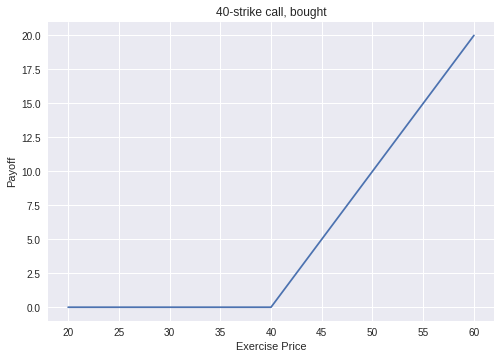

In [0]:
#create option instance, maturity is just arbitrarily given
option1 = VanillaOption(otype = 1, owntype = 1, strike = 40, maturity= 1.) 
ss = np.arange(20,61) #exercise price
payoff = [option1.payoff(s) for s in ss] #compute payoff
plt.plot(ss, payoff)
plt.xlabel('Exercise Price')
plt.ylabel('Payoff')
plt.title('40-strike call, bought');

Now, graph a sold call. The payoff should mirror this.

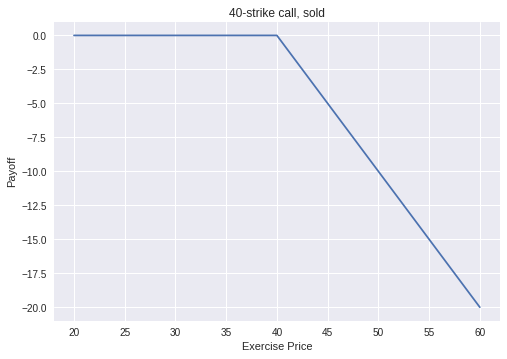

In [0]:
#create option instance, maturity is just arbitrarily given
option2 = VanillaOption(otype = 1, owntype = -1, strike = 40, maturity= 1.) 
ss = np.arange(20,61) #exercise price
payoff = [option2.payoff(s) for s in ss] #compute payoff
plt.plot(ss, payoff)
plt.xlabel('Exercise Price')
plt.ylabel('Payoff')
plt.title('40-strike call, sold');

This appears to work. Verify for a $40$-strike put, both purchased and sold.

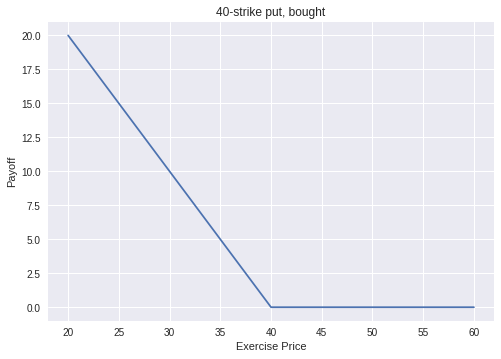

In [0]:
#create option instance, maturity is just arbitrarily given
option3 = VanillaOption(otype = -1, owntype = 1, strike = 40, maturity= 1.) 
ss = np.arange(20,61) #exercise price
payoff = [option3.payoff(s) for s in ss] #compute payoff
plt.plot(ss, payoff)
plt.xlabel('Exercise Price')
plt.ylabel('Payoff')
plt.title('40-strike put, bought');

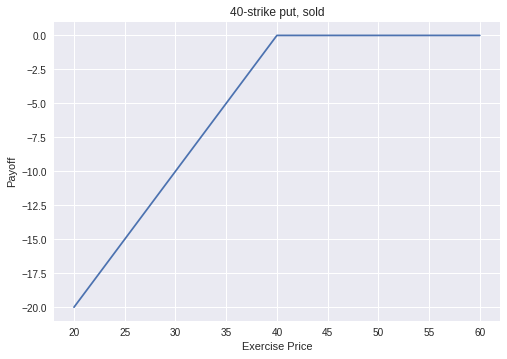

In [0]:
#create option instance, maturity is just arbitrarily given
option4 = VanillaOption(otype = -1, owntype = -1, strike = 40, maturity= 1.) 
ss = np.arange(20,61) #exercise price
payoff = [option4.payoff(s) for s in ss] #compute payoff
plt.plot(ss, payoff)
plt.xlabel('Exercise Price')
plt.ylabel('Payoff')
plt.title('40-strike put, sold');

With the expanded class working properly, we can now start forming the appropriate payoff diagram. For a $40$-strike saddle, we sell $1$ put and $1$ call both with a strike of $40$. Form this:

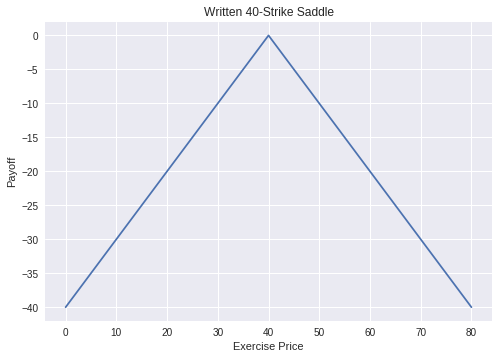

In [0]:
saddle_option1 = VanillaOption(otype = 1, owntype = -1, strike = 40, maturity= 1.) #option 1 is call
saddle_option2 = VanillaOption(otype = -1, owntype = -1, strike = 40, maturity= 1.) #option 2 is put
ss = np.arange(0,81)
payoff_saddle = [saddle_option1.payoff(s) + saddle_option2.payoff(s) for s in ss]
plt.plot(ss, payoff_saddle)
plt.xlabel('Exercise Price')
plt.ylabel('Payoff')
plt.title('Written 40-Strike Saddle');

__Combination Description: Butterfly__

Now, we produce the butterfly. This is the above written $40$-Strike Saddle with an additional purchased $45$-strike call and an additional purchased $35$-strike put. Below the strike price of $35$, the Butterfly's payoff will floor at $-5$, as the $35$-strike put cancels out the $+1$ slope the saddle has. A similar effect occurs above the strike price of $45$, where the 45-strike call cancels out the $-1$ slope the saddle has as well, also flooring the butterfly at $-5$.

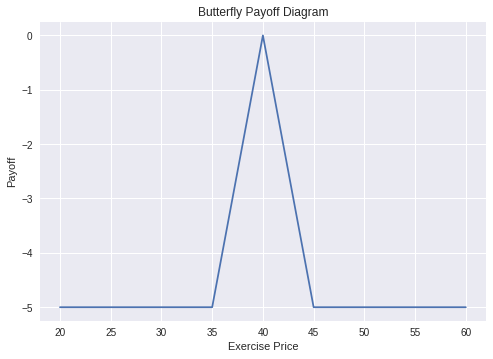

In [0]:
ss = np.arange(20,61)
saddle_option1 = VanillaOption(otype = 1, owntype = -1, strike = 40, maturity= 1.) #option 1 is call
saddle_option2 = VanillaOption(otype = -1, owntype = -1, strike = 40, maturity= 1.) #option 2 is put
bought_45_call = VanillaOption(otype = 1, owntype = 1, strike = 45, maturity = 1)
bought_35_put =  VanillaOption(otype = -1, owntype = 1, strike = 35, maturity = 1)
so1 = saddle_option1
so2 = saddle_option2
b45c = bought_45_call
b35p = bought_35_put #abbreviate for brevity
payoff_butterfly = [so1.payoff(s) + so2.payoff(s) + b45c.payoff(s) + b35p.payoff(s) for s in ss]
plt.plot(ss, payoff_butterfly)
plt.xlabel('Exercise Price')
plt.ylabel('Payoff')
plt.title('Butterfly Payoff Diagram');

Thus, we have the payoff diagram for the requested butterfly spread.